Importing libarys 

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import glob as gb
import pandas as pd 
from sklearn.metrics import confusion_matrix
from keras import layers,models 

In [2]:
dir= 'E:\\py\\sasy\\brain_tumor_dataset'
catigoty=["no","yes"]
ln=[]
#counting our data
for i in catigoty:
 path=os.path.join(dir,i)
 path=os.listdir(path)
 ln.append([len(path),i])
ln

[[98, 'no'], [155, 'yes']]

makeing a plot to see the size of most of the images 

In [3]:
size=[]
for i in catigoty:
 path=os.path.join(dir,i)
 images=gb.glob(pathname= str( path+'/*.jpg'))
 for image in images: 
     im = plt.imread(image)
     size.append(im.shape)

size=pd.Series(size).value_counts().sort_values()

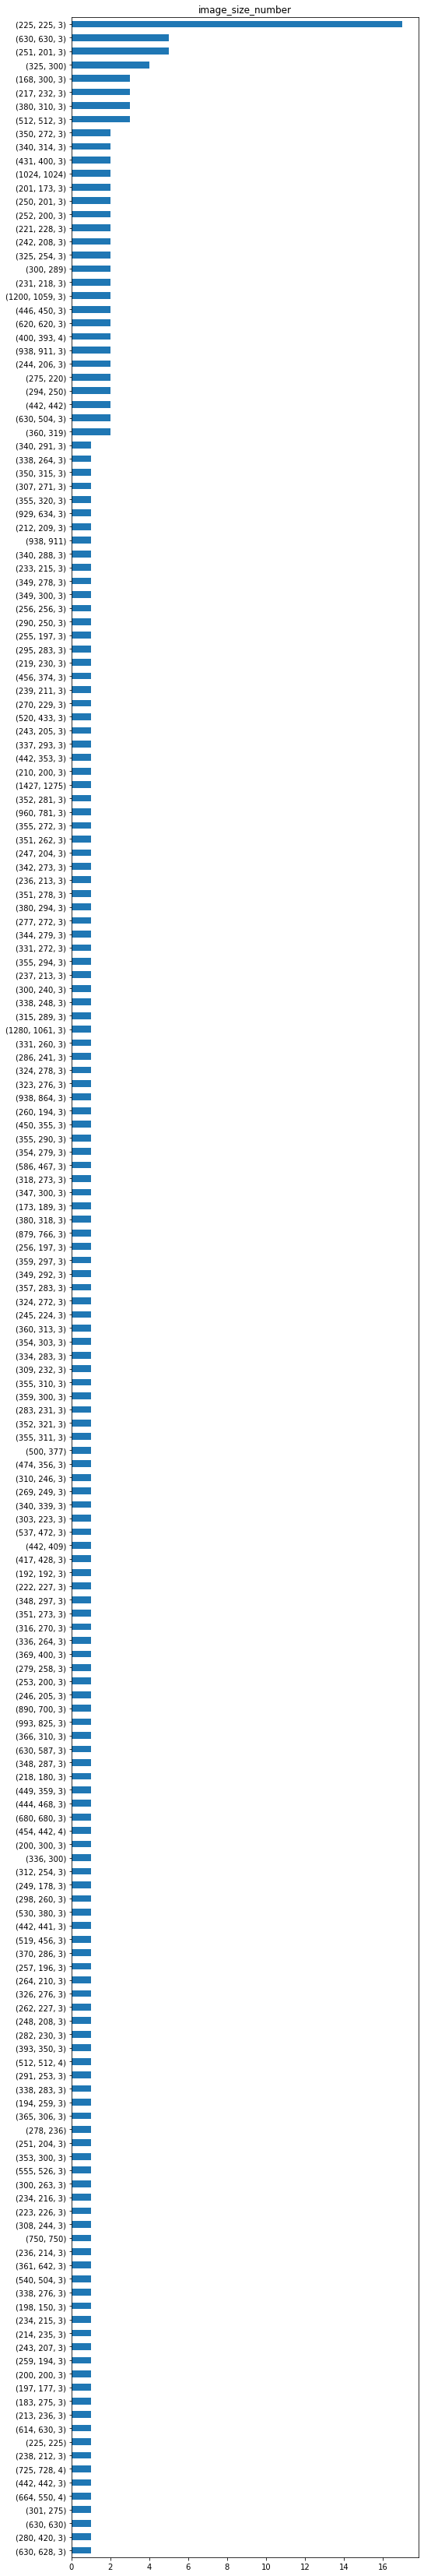

In [4]:
plt.figure(figsize=(8,60))
size.plot(kind='barh',title='image_size_number')
plt.show()

most of the images are in 225 and upove

In [5]:
data=[]
data2=[]
for i in catigoty:
    path=os.path.join(dir, i)
    lable=catigoty.index(i)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        brain_image=cv2.imread(img_path,1)
        brain_image=cv2.cvtColor(brain_image, cv2.COLOR_BGR2RGB)
        try:
            brain_image=cv2.resize(brain_image,(225,225))
            image=np.array(brain_image).flatten()
            image2=np.array(brain_image)
            data.append([image,lable])
            data2.append([image2,lable])
        except Exception as e:
            pass

In [6]:
X,y=[],[]
for featuers,label in data :
    X.append(featuers)
    y.append(label)
X2,y2=[],[]
for featuers,label in data2 :
    X2.append(featuers)
    y2.append(label)

In [7]:
#X=np.array(X)
#X.shape

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=40,shuffle=True)
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=.2,random_state=40,shuffle=True)
X_train=np.array(X_train)/255.0
X_test=np.array(X_test)/255.0
print("shape",X_train.shape)

shape (202, 151875)


Plot some Images from our data to see

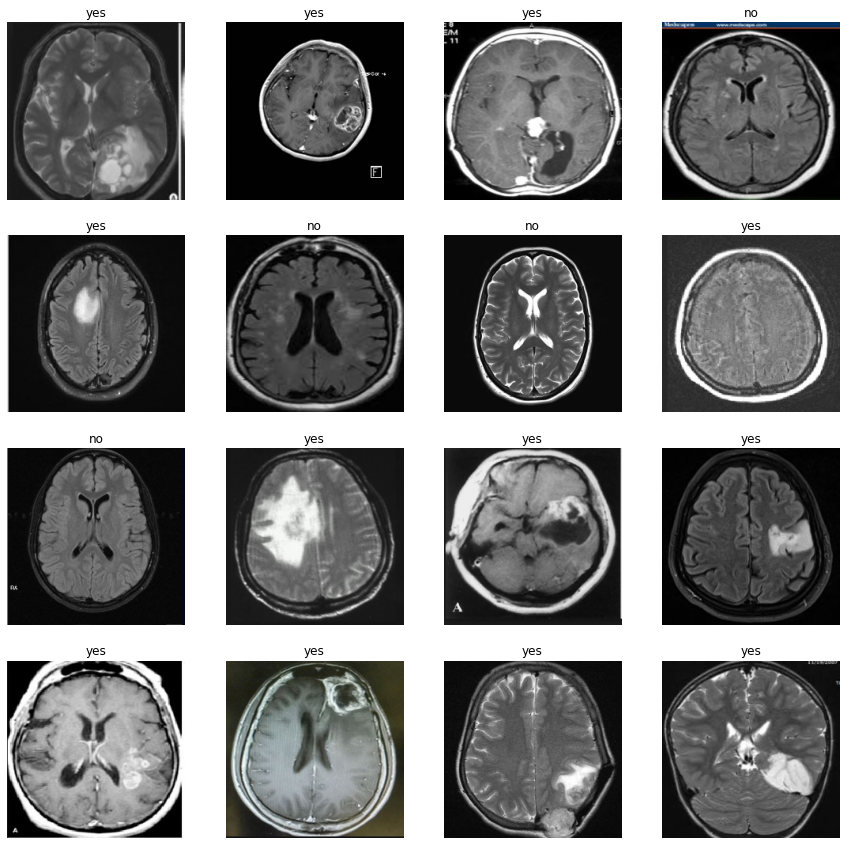

In [9]:
plt.figure(figsize=(15,15))
for i in range(16):
        ax=plt.subplot(4,4,i+1)
        brain=X_train[i].reshape(225,225,3)
        plt.imshow(brain)
        plt.title(catigoty[y_train[i]])
        plt.axis('off')

In [10]:
def finding_the_bestC():
    error1=[]
    error2=[]
    for i in range(1,5):
        svm=SVC(kernel='rbf',C=i,gamma='scale',max_iter=1000000000)
        svm.fit(X_train,y_train)
        y_pred=svm.predict(X_train)
        error1.append(np.mean(y_pred))
        y_pred2= svm.predict(X_test)
        error2.append(np.mean(y_pred2))
    
    plt.figure(figsize=(10,10))
    plt.title("testing C")
    plt.plot(range(1,5),error2,label="test")
    plt.plot(range(1,5),error1,label="train")
    plt.xlabel('C_Value')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

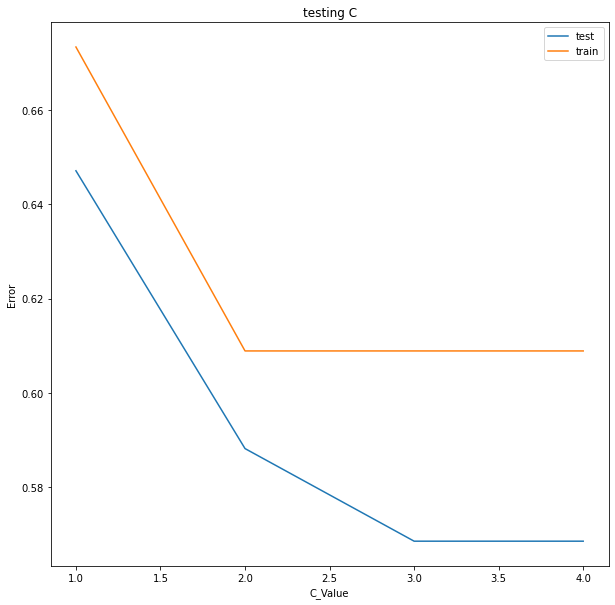

None


In [11]:
print(finding_the_bestC())

In [12]:
clasifiyer=SVC(kernel='rbf',C=3,gamma='scale',max_iter=1000000000)
clasifiyer.fit(X_train,y_train)

#predicting and printing the score 
y_pred=clasifiyer.predict(X_test)
acu=clasifiyer.score(X_test, y_test)
print('accuracy :   ',acu*100,'%')      

accuracy :    82.35294117647058 %


Prediction is : yes
Actual is  yes


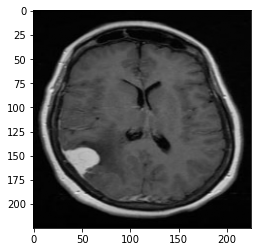

Prediction is : yes
Actual is  yes


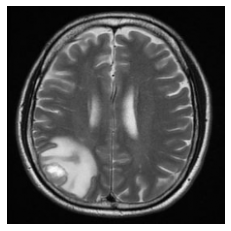

Prediction is : no
Actual is  no


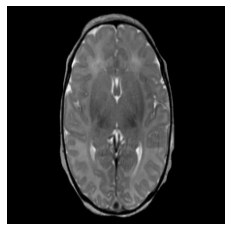

Prediction is : yes
Actual is  yes


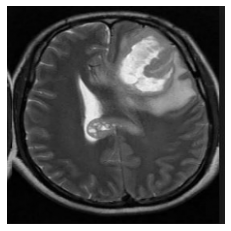

Prediction is : no
Actual is  yes


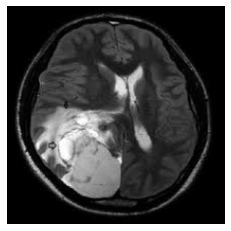

Prediction is : yes
Actual is  no


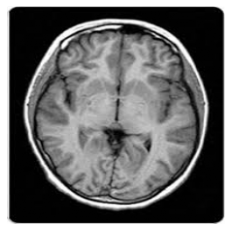

Prediction is : yes
Actual is  yes


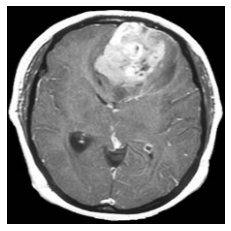

Prediction is : no
Actual is  no


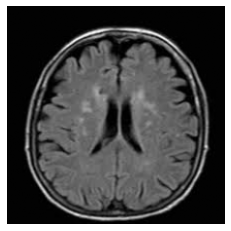

Prediction is : no
Actual is  no


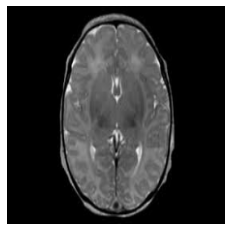

Prediction is : no
Actual is  no


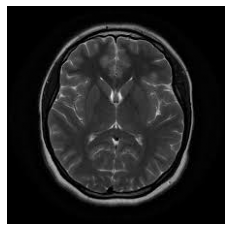

Prediction is : no
Actual is  no


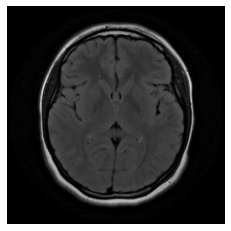

Prediction is : yes
Actual is  yes


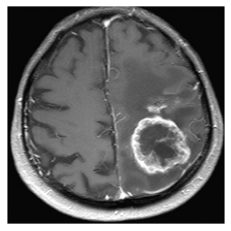

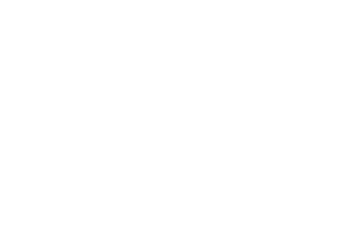

In [13]:
for i in range(12):
    print('Prediction is :',catigoty[y_pred[i]])
    print('Actual is ',catigoty[y_test[i]])
    brain=X_test[i].reshape(225,225,3)
    plt.imshow(brain)
    plt.show()       
    plt.axis('off') 

[[16  3]
 [ 6 26]]


<AxesSubplot:>

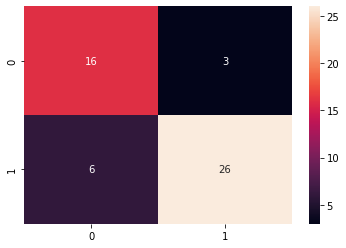

In [14]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
print(confusion_mtx)
sns.heatmap(confusion_mtx,annot=True)

sample cnn model show preform better and have more acc

convert all to arrays

In [15]:
X_train2=np.array(X_train2)
X_test2=np.array(X_test2)
y_train2=np.array(y_train2)
y_test2=np.array(y_test2)
X_train2.shape

(202, 225, 225, 3)

In [28]:
Model =models.Sequential([
    layers.Conv2D(47,kernel_size=(3,3),activation='relu',input_shape=(225,225,3)),
    layers.MaxPool2D(2,2),
    layers.Conv2D(94,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Conv2D(94,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Conv2D(94,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Conv2D(94,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Flatten(),
    layers.Dense(94,activation='relu'),
    layers.Dropout(rate=0.5),            
    layers.Dense(2,activation='softmax') ,
])
Model.build(input_shape=(225,225,3))

In [29]:
Model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 223, 223, 47)      1316      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 47)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 94)      39856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 94)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 94)        79618     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 26, 26, 94)      

In [30]:
Model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
epochs =30
ThisModel = Model.fit(X_train2, y_train2, epochs=epochs,verbose=1)

Epoch 1/30
7/7 [==============================] - 17s 2s/step - loss: 11.6685 - accuracy: 0.5594
Epoch 2/30
7/7 [==============================] - 16s 2s/step - loss: 0.9993 - accuracy: 0.5693
Epoch 3/30
7/7 [==============================] - 16s 2s/step - loss: 0.6275 - accuracy: 0.6782
Epoch 4/30
7/7 [==============================] - 16s 2s/step - loss: 0.5697 - accuracy: 0.7030
Epoch 5/30
7/7 [==============================] - 16s 2s/step - loss: 0.6317 - accuracy: 0.6683
Epoch 6/30
7/7 [==============================] - 16s 2s/step - loss: 0.6296 - accuracy: 0.6733
Epoch 7/30
7/7 [==============================] - 16s 2s/step - loss: 0.5563 - accuracy: 0.7178
Epoch 8/30
7/7 [==============================] - 16s 2s/step - loss: 0.5379 - accuracy: 0.7574
Epoch 9/30
7/7 [==============================] - 17s 2s/step - loss: 0.4932 - accuracy: 0.7624
Epoch 10/30
7/7 [==============================] - 16s 2s/step - loss: 0.5223 - accuracy: 0.7772
Epoch 11/30
7/7 [=====================

In [32]:
Model.evaluate(X_test2, y_test2)

2/2 [==============================] - 1s 271ms/step - loss: 0.5481 - accuracy: 0.8824


[0.5480697751045227, 0.8823529481887817]

In [34]:
ThisModel.history.keys()

dict_keys(['loss', 'accuracy'])

In [36]:
acc=ThisModel.history['accuracy']
loss=ThisModel.history['loss']

(-1.4500000000000002, 30.45, -0.42547055184841154, 12.244368335604667)

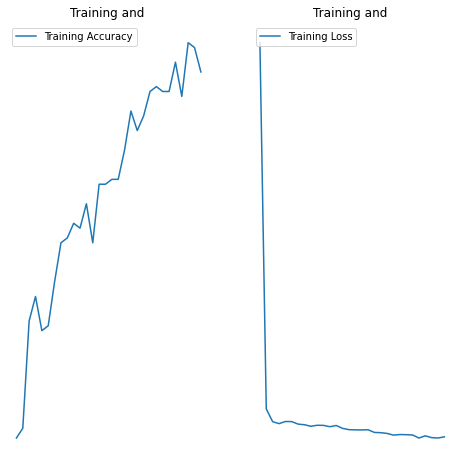

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.legend(loc='upper left')
plt.title('Training and ')
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(range(30), loss, label='Training Loss')
plt.legend(loc='upper left')
plt.title('Training and ')
plt.axis('off')

In [43]:
predictions = Model.predict(X_test2)
y_pred = [np.argmax(probas) for probas in predictions]

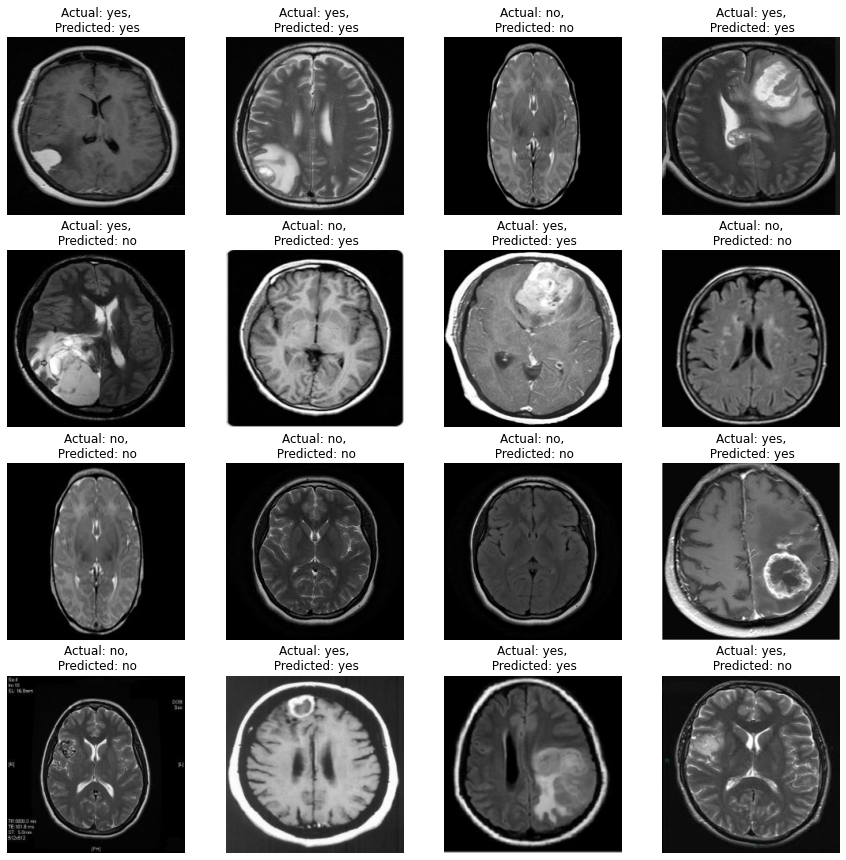

In [47]:
plt.figure(figsize=(15,15))
for i in range(16):
        ax=plt.subplot(4,4,i+1)
        brain=X_test2[i].reshape(225,225,3)
        plt.imshow(brain)
        plt.title(f"Actual: {catigoty[y_test2[i]]},\n Predicted: {catigoty[y_pred[i]]}")
        plt.axis('off')

[[16  3]
 [ 3 29]]


<AxesSubplot:>

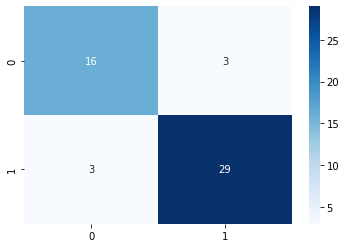

In [52]:
confusion_mtx = confusion_matrix(y_test2, y_pred) 
print(confusion_mtx)
sns.heatmap(confusion_mtx,annot=True,cmap='Blues')